### Exercise 1

In [15]:
library(tidyverse)
library(dplyr)


#six boxes toy model inference
#1) user can insert color of randomly extracted box
#2) prints prob of box selection
#3) plots prob for each box

white or black? Type end to quit.black
white or black? Type end to quit.black
white or black? Type end to quit.black
white or black? Type end to quit.black
white or black? Type end to quit.black
white or black? Type end to quit.white
white or black? Type end to quit.end
[1] "Here are the results"
# A tibble: 6 x 6
     h0    h1     h2     h3      h4    h5
  <dbl> <dbl>  <dbl>  <dbl>   <dbl> <dbl>
1 0.167 0.167 0.167  0.167  0.167   0.167
2 0.333 0.267 0.20   0.133  0.0667  0    
3 0.455 0.291 0.164  0.0727 0.0182  0    
4 0.556 0.284 0.120  0.0356 0.00444 0    
5 0.638 0.261 0.0827 0.0163 0.00102 0    
6 0     0.545 0.345  0.102  0.00851 0    


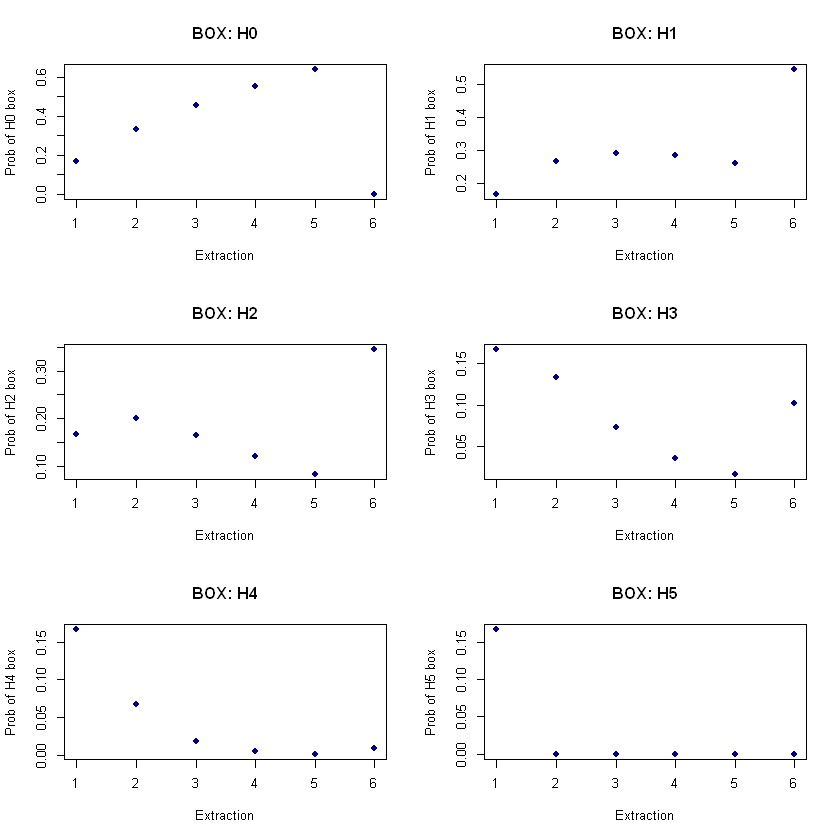

In [16]:
#prob of each box initially is 1/6
#j = 0:5
#Ew prob of a white stone
#Eb prob of a black stone
#prob for first pick is 0.5


boxes <- tibble(h0 = 1/6, h1 = 1/6, h2 = 1/6, h3 = 1/6, h4 = 1/6, h5 = 1/6)

six_toys_sim <- function() {
    
    selection <- vector(mode = "list")
      
    data_white <- vector(mode = "list")
    data_black <- vector(mode = "list")
    for (j in 0:5){
            data_white <- c(data_white, j/5)
            }
    #data_white
    for (j in 0:5){
            data_black <- c(data_black, (5-j)/5)}    
    #data_black
    
    while(TRUE){
        
    stone <- readline(prompt="white or black? Type end to quit.")
        
    if(stone == "end"){
        print("Here are the results")
        break
    }
        
    if((stone == "black")) {
        data <- vector(mode = "list")
        selection <- c(selection, stone)
        n <- length(selection)
        #nth row
        nth_row <- (data_black*boxes[n-1,])
        boxes <- rbind(boxes, nth_row)
        boxes[n,] <- boxes[n,]/rowSums(boxes[n,])
        #boxes <- rbind(boxes, nth_row)

                                      
    }
    if((stone == "white")) {
        data <- vector(mode = "list")
        selection <- c(selection, stone)
        n <- length(selection)
        #nth row
        nth_row <- (data_white*boxes[n-1,])
        boxes <- rbind(boxes, nth_row)
        boxes[n,] <- boxes[n,]/rowSums(boxes[n,])
        #boxes <- rbind(boxes, nth_row)
    }

}
print(boxes)
par(mfrow = c(3,2))
plot(boxes$h0, ylab ="Prob of H0 box", xlab ="Extraction", col = "darkblue", type = 'p', pch = 16,
    main = "BOX: H0")
plot(boxes$h1, ylab ="Prob of H1 box", xlab ="Extraction", col = "darkblue", type = 'p', pch = 16,
    main = "BOX: H1")
plot(boxes$h2, ylab ="Prob of H2 box", xlab ="Extraction", col = "darkblue", type = 'p', pch = 16,
    main = "BOX: H2")
plot(boxes$h3, ylab ="Prob of H3 box", xlab ="Extraction", col = "darkblue", type = 'p', pch = 16,
    main = "BOX: H3")
plot(boxes$h4, ylab ="Prob of H4 box", xlab ="Extraction", col = "darkblue", type = 'p', pch = 16,
    main = "BOX: H4")
plot(boxes$h5, ylab ="Prob of H5 box", xlab ="Extraction", col = "darkblue", type = 'p', pch = 16,
    main = "BOX: H5")
#print(selection)
}
        
six_toys_sim()

### Exercise 2

# A tibble: 60 x 6
      h0     h1    h2     h3     h4    h5
   <dbl>  <dbl> <dbl>  <dbl>  <dbl> <dbl>
 1 0.167 0.167  0.167 0.167  0.167  0.167
 2 0.333 0.267  0.20  0.133  0.0667 0    
 3 0.455 0.291  0.164 0.0727 0.0182 0    
 4 0     0.32   0.36  0.240  0.08   0    
 5 0     0.438  0.370 0.164  0.0274 0    
 6 0     0.246  0.415 0.277  0.0615 0    
 7 0     0.114  0.386 0.386  0.114  0    
 8 0     0.0457 0.309 0.463  0.183  0    
 9 0     0.0825 0.418 0.418  0.0825 0    
10 0     0.0330 0.334 0.501  0.132  0    
# ... with 50 more rows


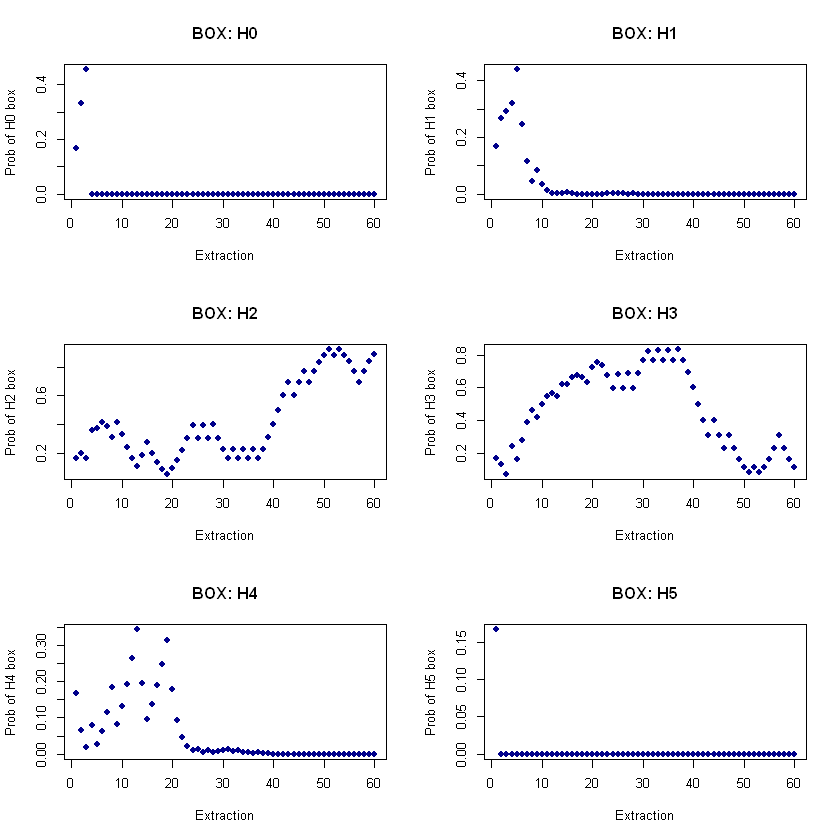

In [17]:
boxes <- tibble(h0 = 1/6, h1 = 1/6, h2 = 1/6, h3 = 1/6, h4 = 1/6, h5 = 1/6)

six_toys_sim_auto <- function(n) {
    
    selection <- vector(mode = "list")
      
    data_white <- vector(mode = "list")
    data_black <- vector(mode = "list")
    for (j in 0:5){
            data_white <- c(data_white, j/5)
            }
    for (j in 0:5){
            data_black <- c(data_black, (5-j)/5)}
    
    box <- sample(0:5, 1)
    stones <- sample(c("white", "black"), size = n, prob = c(as.numeric(data_white[box]), 1-(as.numeric(data_white[box]))), replace=TRUE)
    
    for (stone in stones){
        
    if((stone == "black")) {
        data <- vector(mode = "list")
        selection <- c(selection, stone)
        n <- length(selection)
        #nth row
        nth_row <- (data_black*boxes[n-1,])
        boxes <- rbind(boxes, nth_row)
        boxes[n,] <- boxes[n,]/rowSums(boxes[n,])
        #boxes <- rbind(boxes, nth_row)

                                      
    }
    if((stone == "white")) {
        data <- vector(mode = "list")
        selection <- c(selection, stone)
        n <- length(selection)
        #nth row
        nth_row <- (data_white*boxes[n-1,])
        boxes <- rbind(boxes, nth_row)
        boxes[n,] <- boxes[n,]/rowSums(boxes[n,])
        #boxes <- rbind(boxes, nth_row)
    }

}
print(boxes)
par(mfrow = c(3,2))
plot(boxes$h0, ylab ="Prob of H0 box", xlab ="Extraction", col = "darkblue", type = 'p', pch = 16,
    main = "BOX: H0")
plot(boxes$h1, ylab ="Prob of H1 box", xlab ="Extraction", col = "darkblue", type = 'p', pch = 16,
    main = "BOX: H1")
plot(boxes$h2, ylab ="Prob of H2 box", xlab ="Extraction", col = "darkblue", type = 'p', pch = 16,
    main = "BOX: H2")
plot(boxes$h3, ylab ="Prob of H3 box", xlab ="Extraction", col = "darkblue", type = 'p', pch = 16,
    main = "BOX: H3")
plot(boxes$h4, ylab ="Prob of H4 box", xlab ="Extraction", col = "darkblue", type = 'p', pch = 16,
    main = "BOX: H4")
plot(boxes$h5, ylab ="Prob of H5 box", xlab ="Extraction", col = "darkblue", type = 'p', pch = 16,
    main = "BOX: H5")
}
        
six_toys_sim_auto(60)

### Exercise 3

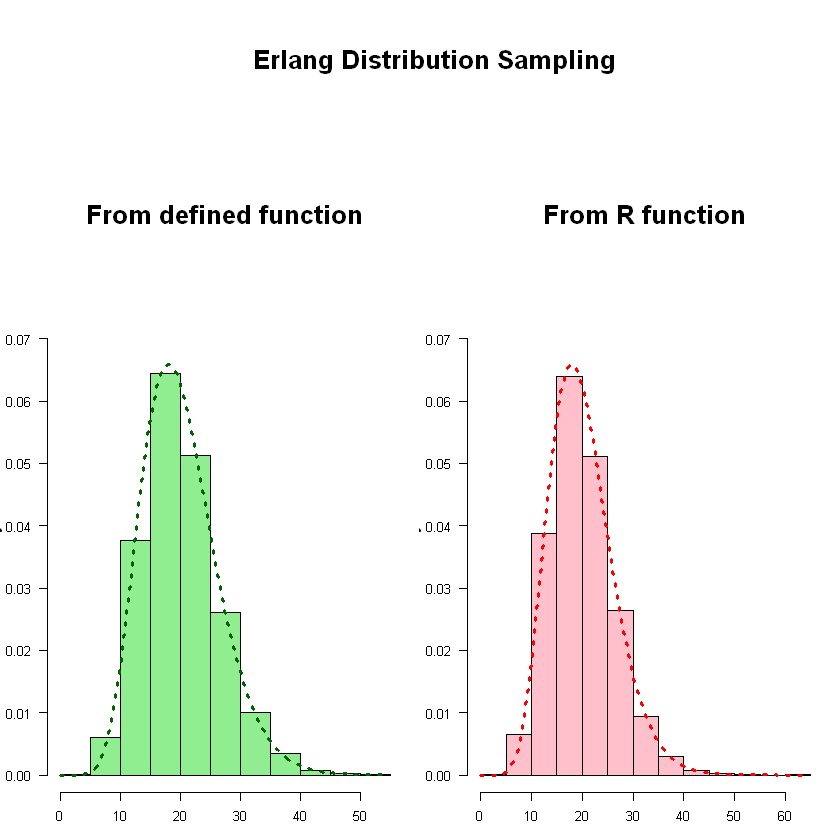

In [14]:
#sample variables from Erlang distribution Gamma(m, beta)
#sum m independant exponental random variables Xj ~ exp(beta)


m <- 10
beta <- 0.5
n <- 10000

erlang <- function(n, m, beta){ replicate(n, (−1/beta)∗log(prod(runif(m, 0, 1)))) }
par(mar=c(3,3,1,1))
layout(matrix(c(1,2,3,1,4,5),ncol=2),heights=c(1,1,3.5))

plot.new()

text(0.5,0.5,"Erlang Distribution Sampling",cex=2,font=2)

plot.new()
text(0.5,0.5,"From defined function",cex=2,font=2)

hist(erlang(n, m, beta), freq=FALSE,
     col="lightgreen", xlab="x", cex.lab=1.5, las=1,
     main = NULL,
     ylim = c(0, 0.07))
curve(dgamma(x, m, beta), col="darkgreen", lt="dotted", lw=3, add=TRUE)

plot.new()
text(0.5,0.5,"From R function",cex=2,font=2)
hist(rgamma(n, m, beta), freq=FALSE,
     col="pink", xlab="x", cex.lab=1.5, las=1,
     main = NULL,
     ylim = c(0, 0.07))
curve(dgamma(x, m, beta), col="red", lt="dotted", lw=3, add=TRUE)

### Exercise 4

In [13]:
seed_number = 3446
number = seed_number
number_set = vector(mode = "list")
counter = 0

#%notin% <- Negate(%in%)

#while (number !in number_set)
for (counter in 1:20) {
    counter <- counter + 1
    
    number_set <- c(number_set, number)

    seed <- (number*number)
    #[2:6]
    x <- unlist(strsplit(as.character(seed),""))
    length_num <- length(x)
    
    #add zeros if x is not long enough
    ifelse((length(x)<2*length(number)),
                num <- c(rep(0,2*length_num - length(number)), number),
                num <-  number
               )
    #take only the central values of x
    x <- x[(length_num/2-1):(length_num/2+2)]
    number <- (as.numeric(paste(x, collapse="")))
    
    #if algorithm returns a NA, then break out of loop
    if(is.na(number)) {number=TRUE
                       break}
    #if algorithm returns number that has already been generated, break
    if (number %in% number_set) {break}
    }

number_set

[[1]]
[1] 3446

[[2]]
[1] 8749

[[3]]
[1] 5450

[[4]]
[1] 7025

[[5]]
[1] 3506

[[6]]
[1] 2920

[[7]]
[1] 5264

[[8]]
[1] 7096

[[9]]
[1] 3532

[[10]]
[1] 4750

[[11]]
[1] 5625

[[12]]
[1] 6406

[[13]]
[1] 368

[[14]]
[1] 3542

[[15]]
[1] 5457

[[16]]
[1] 7788

[[17]]
[1] 6529

[[18]]
[1] 6278

[[19]]
[1] 4132

[[20]]
[1] 734